<a href="https://colab.research.google.com/github/Enovak001/SpaceJamTitanic/blob/main/SpaceJamTitanic_CustomPyTorchTrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


In [ ]:
# Getting train data
test_list = pd.read_csv('/content/drive/MyDrive/Spaceship_Titanic_binary_class/test.csv')
print(test_list.describe())
print(test_list.head())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4197.000000  
mean     310.710031  
std     1246.994742  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       36.000000  
max    22272.000000  
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth    

In [ ]:
test_list.shape

(4277, 13)

In [ ]:
# Getting test data
train_list = pd.read_csv('/content/drive/MyDrive/Spaceship_Titanic_binary_class/train.csv')
print(train_list.describe())
print(train_list.head())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa    

### Data description:

`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

`Destination` - The planet the passenger will be debarking to.

`Age` - The age of the passenger.

`VIP` - Whether the passenger has paid for special VIP service during the voyage.

`RoomService, FoodCourt, ShoppingMall, Spa, VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`Name` - The first and last names of the passenger.

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [ ]:
raw_train_df=pd.DataFrame(train_list, index=None)
raw_train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
raw_train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Train data Feature engineering

In [ ]:
# make a copy of dataframe... otherwise we mess also raw_train_df
df_temp = raw_train_df.copy()
df_temp

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
train_pass_id = df_temp.PassengerId
train_pass_id

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [ ]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
# This will turn all string value into categories
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype('category').cat.as_ordered()

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   category
 1   HomePlanet    8492 non-null   category
 2   CryoSleep     8476 non-null   category
 3   Cabin         8494 non-null   category
 4   Destination   8511 non-null   category
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   category
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   category
 13  Transported   8693 non-null   bool    
dtypes: bool(1), category(7), float64(6)
memory usage: 1.4 MB


In [ ]:
df_temp.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Filling in missing numerical features with `median` value

In [ ]:
# This will list all numeric columns
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [ ]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [ ]:
# Fill numeric columns with median value
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
          # Add a binary column which tells us if the data was missing or not
          df_temp[label+'_is_missing'] = pd.isnull(content)
          # Fill missing numeric valeus with median
          fill_in_median = content.fillna(content.median())
          df_temp[label] = fill_in_median

In [ ]:
# Check for more numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
# Check to see how many examples were missing

df_temp.ShoppingMall.value_counts()

0.0       5795
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64

In [ ]:
df_temp.isna().sum()

PassengerId                  0
HomePlanet                 201
CryoSleep                  217
Cabin                      199
Destination                182
Age                          0
VIP                        203
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Name                       200
Transported                  0
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
dtype: int64

### Filling in missing categorical features with corresponding values

In [ ]:
# check for columns that are not numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
df_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_is_missing,RoomService_is_missing,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False,False,False,False,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,False,False,False,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,False,False,False,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False,False,False,False,False,False


#### Data description:

`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [ ]:
df_temp[["Cabin_deck","Cabin_no.","Cabin_side"]]=df_temp["Cabin"].str.split("/",expand=True)
df_temp.drop(columns=["Cabin"],inplace=True)

df_temp[["firstname","last_name"]]=df_temp["Name"].str.split(" ",expand=True)
df_temp.drop(columns=["Name"],inplace=True)

df_temp[["PassengerId_group","PassenngerId_no"]]=df_temp["PassengerId"].str.split("_",expand=True)
df_temp.drop(columns=["PassengerId"],inplace=True)   # -> we have train_pass_id

In [ ]:
train_pass_id

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [ ]:
df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,Cabin_deck,Cabin_no.,Cabin_side,firstname,last_name,PassengerId_group,PassenngerId_no
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,False,False,False,B,0,P,Maham,Ofracculy,0001,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,False,False,False,F,0,S,Juanna,Vines,0002,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,False,False,False,A,0,S,Altark,Susent,0003,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,False,False,False,A,0,S,Solam,Susent,0003,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,False,False,False,F,1,S,Willy,Santantines,0004,01


In [ ]:
# check for columns that are not numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

HomePlanet
CryoSleep
Destination
VIP
Cabin_deck
Cabin_no.
Cabin_side
firstname
last_name
PassengerId_group
PassenngerId_no


In [ ]:
df_temp.isna().sum()

HomePlanet                 201
CryoSleep                  217
Destination                182
Age                          0
VIP                        203
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
Cabin_deck                 199
Cabin_no.                  199
Cabin_side                 199
firstname                  200
last_name                  200
PassengerId_group            0
PassenngerId_no              0
dtype: int64

In [ ]:
# Turn categorical variables into numbers and fill missing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate weather sample has a missing value
        df_temp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes +1

In [ ]:
# Check for more categorical columns have null values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
df_temp.isna().sum()

HomePlanet                      0
CryoSleep                       0
Destination                     0
Age                             0
VIP                             0
RoomService                     0
FoodCourt                       0
ShoppingMall                    0
Spa                             0
VRDeck                          0
Transported                     0
Age_is_missing                  0
RoomService_is_missing          0
FoodCourt_is_missing            0
ShoppingMall_is_missing         0
Spa_is_missing                  0
VRDeck_is_missing               0
Cabin_deck                      0
Cabin_no.                       0
Cabin_side                      0
firstname                       0
last_name                       0
PassengerId_group               0
PassenngerId_no                 0
HomePlanet_is_missing           0
CryoSleep_is_missing            0
Destination_is_missing          0
VIP_is_missing                  0
Cabin_deck_is_missing           0
Cabin_no._is_m

In [ ]:
df_temp.Transported.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [ ]:
df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing,PassengerId_group_is_missing,PassenngerId_no_is_missing
0,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# X = df_temp.drop('Transported', axis=1)
# y = df_temp.Transported

In [ ]:
# #split the data into train and test sets

# np.random.seed(42)

# X_train = X.iloc[:int(len(X) * 0.8), :]
# X_val = X.iloc[int(len(X) * 0.8):, :]
# y_train = y.iloc[:int(len(y) * 0.8)]
# y_val = y.iloc[int(len(y) * 0.8):]

## Test data Feature engineering

In [ ]:
test_df=pd.DataFrame(test_list, index=None)

In [ ]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
test_df_temp = test_df.copy()

In [ ]:
test_pass_id = test_df_temp.PassengerId
test_pass_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [ ]:
for label, content in test_df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
# This will turn all string value into categories
for label, content in test_df_temp.items():
    if pd.api.types.is_string_dtype(content):
        test_df_temp[label]=content.astype('category').cat.as_ordered()

In [ ]:
test_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   4277 non-null   category
 1   HomePlanet    4190 non-null   category
 2   CryoSleep     4184 non-null   category
 3   Cabin         4177 non-null   category
 4   Destination   4185 non-null   category
 5   Age           4186 non-null   float64 
 6   VIP           4184 non-null   category
 7   RoomService   4195 non-null   float64 
 8   FoodCourt     4171 non-null   float64 
 9   ShoppingMall  4179 non-null   float64 
 10  Spa           4176 non-null   float64 
 11  VRDeck        4197 non-null   float64 
 12  Name          4183 non-null   category
dtypes: category(7), float64(6)
memory usage: 721.5 KB


In [ ]:
test_df_temp.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [ ]:
test_df_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Filling in missing numerical features with `median` value

In [ ]:
# This will list all numeric columns
for label, content in test_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [ ]:
# Check for which numeric columns have null values
for label, content in test_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [ ]:
# Fill numeric columns with median value
for label, content in test_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
          # Add a binary column which tells us if the data was missing or not
          test_df_temp[label+'_is_missing'] = pd.isnull(content)
          # Fill missing numeric valeus with median
          test_df_temp[label] = fill_in_median

In [ ]:
# Check for more numeric columns have null values
for label, content in test_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
# Check to see how many examples were missing

test_df_temp.ShoppingMall.value_counts()

0.0       2800
1.0         78
2.0         34
5.0         32
3.0         29
          ... 
6064.0       1
807.0        1
253.0        1
1333.0       1
5353.0       1
Name: ShoppingMall, Length: 793, dtype: int64

In [ ]:
test_df_temp.isna().sum()

PassengerId                  0
HomePlanet                  87
CryoSleep                   93
Cabin                      100
Destination                 92
Age                          0
VIP                         93
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Name                        94
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
dtype: int64

### Filling in missing categorical features with corresponding values

In [ ]:
# check for columns that are not numeric
for label, content in test_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
test_df_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_is_missing,RoomService_is_missing,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False,False,False,False,False,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,44.0,False,44.0,44.0,44.0,44.0,44.0,Lerome Peckers,False,False,False,False,False,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,49.0,False,49.0,49.0,49.0,49.0,49.0,Sabih Unhearfus,False,False,False,False,False,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,193.0,False,193.0,193.0,193.0,193.0,193.0,Meratz Caltilter,False,False,False,False,False,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,2.0,False,2.0,2.0,2.0,2.0,2.0,Brence Harperez,False,False,False,False,False,False


In [ ]:
test_df_temp[["Cabin_deck","Cabin_no.","Cabin_side"]]=test_df_temp["Cabin"].str.split("/",expand=True)
test_df_temp.drop(columns=["Cabin"],inplace=True)

test_df_temp[["firstname","last_name"]]=test_df_temp["Name"].str.split(" ",expand=True)
test_df_temp.drop(columns=["Name"],inplace=True)

test_df_temp[["PassengerId_group","PassenngerId_no"]]=test_df_temp["PassengerId"].str.split("_",expand=True)
test_df_temp.drop(columns=["PassengerId"],inplace=True)   # -> we have test_pass_id

In [ ]:
test_df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,Cabin_deck,Cabin_no.,Cabin_side,firstname,last_name,PassengerId_group,PassenngerId_no
0,Earth,True,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,...,False,False,False,G,3,S,Nelly,Carsoning,0013,01
1,Earth,False,TRAPPIST-1e,44.0,False,44.0,44.0,44.0,44.0,44.0,...,False,False,False,F,4,S,Lerome,Peckers,0018,01
2,Europa,True,55 Cancri e,49.0,False,49.0,49.0,49.0,49.0,49.0,...,False,False,False,C,0,S,Sabih,Unhearfus,0019,01
3,Europa,False,TRAPPIST-1e,193.0,False,193.0,193.0,193.0,193.0,193.0,...,False,False,False,C,1,S,Meratz,Caltilter,0021,01
4,Earth,False,TRAPPIST-1e,2.0,False,2.0,2.0,2.0,2.0,2.0,...,False,False,False,F,5,S,Brence,Harperez,0023,01


In [ ]:
# check for columns that are not numeric
for label, content in test_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

HomePlanet
CryoSleep
Destination
VIP
Cabin_deck
Cabin_no.
Cabin_side
firstname
last_name
PassengerId_group
PassenngerId_no


In [ ]:
test_df_temp.isna().sum()

HomePlanet                  87
CryoSleep                   93
Destination                 92
Age                          0
VIP                         93
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
Cabin_deck                 100
Cabin_no.                  100
Cabin_side                 100
firstname                   94
last_name                   94
PassengerId_group            0
PassenngerId_no              0
dtype: int64

In [ ]:
# Turn categorical variables into numbers and fill missing
for label, content in test_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate weather sample has a missing value
        test_df_temp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1
        test_df_temp[label] = pd.Categorical(content).codes +1

In [ ]:
# Check for more categorical columns have null values
for label, content in test_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
test_df_temp.isna().sum()

HomePlanet                      0
CryoSleep                       0
Destination                     0
Age                             0
VIP                             0
RoomService                     0
FoodCourt                       0
ShoppingMall                    0
Spa                             0
VRDeck                          0
Age_is_missing                  0
RoomService_is_missing          0
FoodCourt_is_missing            0
ShoppingMall_is_missing         0
Spa_is_missing                  0
VRDeck_is_missing               0
Cabin_deck                      0
Cabin_no.                       0
Cabin_side                      0
firstname                       0
last_name                       0
PassengerId_group               0
PassenngerId_no                 0
HomePlanet_is_missing           0
CryoSleep_is_missing            0
Destination_is_missing          0
VIP_is_missing                  0
Cabin_deck_is_missing           0
Cabin_no._is_missing            0
Cabin_side_is_

In [ ]:
df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing,PassengerId_group_is_missing,PassenngerId_no_is_missing
0,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
test_df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing,PassengerId_group_is_missing,PassenngerId_no_is_missing
0,1,2,3,0.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,44.0,1,44.0,44.0,44.0,44.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,2,2,1,49.0,1,49.0,49.0,49.0,49.0,49.0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,3,193.0,1,193.0,193.0,193.0,193.0,193.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,2.0,1,2.0,2.0,2.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False


## Data is ready, so we can start with prepairing the model.

In [ ]:
# scaler = MinMaxScaler()
# scaler.fit_transform(df_temp)

In [ ]:
X = df_temp.drop('Transported', axis=1)
y = df_temp.Transported

In [ ]:
#split the data into train and test sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# np.random.seed(42)

# X_train = X.iloc[:int(len(X) * 0.8), :]
# X_val = X.iloc[int(len(X) * 0.8):, :]
# y_train = y.iloc[:int(len(y) * 0.8)]
# y_val = y.iloc[int(len(y) * 0.8):]

In [ ]:
#!pip install scikeras

```
def create_larger():
	# create model
  model = Sequential()
  model.add(Dense(int(len(X_train.columns)/2), input_shape=(len(X_train.columns),), activation='relu'))
  model.add(Dense(int(len(X_train.columns)/2), activation='relu'))
  model.add(Dense(int(len(X_train.columns)/2), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_larger, epochs=100, batch_size=32, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=False)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
```

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(test_df_temp)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((6954, 34), (6954,), (1739, 34), (1739,), (4277, 34))

In [ ]:
X_train.dtype, y_train.dtype, X_val.dtype, y_val.dtype, X_test.dtype

(dtype('float64'),
 dtype('bool'),
 dtype('float64'),
 dtype('bool'),
 dtype('float64'))

In [ ]:
y_train.to_numpy()

array([False, False,  True, ..., False, False, False])

In [ ]:
from torch.utils.data import DataLoader, Dataset

BATCH_SIZE = 32
LEARNING_RATE = 0.001

## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = TrainData(torch.FloatTensor(X_train), 
                          torch.FloatTensor(y_train.to_numpy()))

## validation data    
class ValData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_dataset = ValData(torch.FloatTensor(X_val),
                        torch.FloatTensor(y_val.to_numpy()))

## train data
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
                
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)


main_test_dataset = TestData(torch.FloatTensor(X_test))

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=main_test_dataset, batch_size=1)

In [ ]:
# def make_data(tfeature, tlabel):
  
#   tens_feature = torch.from_numpy(tfeature)
#   tens_label = torch.as_tensor(tlabel)
  
#   return tens_feature, tens_label
  

In [ ]:
len(X_train), len(y_train), len(X_val), len(y_val)

(6954, 6954, 1739, 1739)

In [ ]:
range(len(X_train))

range(0, 6954)

In [ ]:
# training_data=[]
# for i in range(len(X_train)):
#   training_data.append([X_train[i], y_train[i]])

In [ ]:
# valid_data=[]
# for i in range(len(X_val)):
#   valid_data.append([X_val[i], y_val[i]])

In [ ]:
# training_data[0]

In [ ]:
# len(training_data[0]), len(training_data)

In [ ]:
# from torch.utils.data import DataLoader

# # Setup the batch size hyperparameter
# BATCH_SIZE = 32

# # Turn datasets into iterables (batches)
# train_dataloader = DataLoader(dataset=training_data,
#                               batch_size=BATCH_SIZE,
#                               shuffle=True)

# val_dataloader = DataLoader(dataset=valid_data,
#                              batch_size=BATCH_SIZE,
#                              shuffle=False)

# train_dataloader, val_dataloader
# # Let's check out what we've created
print(f"Dataloaders: {train_loader, val_loader, test_loader}") 
print(f"Length of train dataloader: {len(train_loader)} batches of {BATCH_SIZE}")
print(f"Length of validation dataloader: {len(val_loader)} batches of {BATCH_SIZE}")
print(f"Length of validation dataloader: {len(test_loader)} batches of {1}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7efe005b1310>, <torch.utils.data.dataloader.DataLoader object at 0x7efe005b12d0>, <torch.utils.data.dataloader.DataLoader object at 0x7efe005b1590>)
Length of train dataloader: 218 batches of 32
Length of validation dataloader: 55 batches of 32
Length of validation dataloader: 4277 batches of 1


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape, train_features_batch.dtype, train_labels_batch.dtype

(torch.Size([32, 34]), torch.Size([32]), torch.float32, torch.float32)

In [ ]:
train_features_batch[0], train_labels_batch[0]

(tensor([0.3333, 0.5000, 1.0000, 0.2785, 0.5000, 0.0000, 0.0297, 0.0000, 0.0000,
         0.0170, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7500, 0.0699,
         0.5000, 0.2095, 0.1227, 0.5854, 0.2857, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]), tensor(0.))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Creating a model class!!!!

### SpaceTitanicV1

In [ ]:
class SpaceTitanicV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super(SpaceTitanicV1, self).__init__()

    self.layer_1 = nn.Linear(input_shape, hidden_units) 
    self.layer_2 = nn.Linear(hidden_units, hidden_units)
    self.layer_3 = nn.Linear(hidden_units, hidden_units)
    self.layer_out = nn.Linear(hidden_units, output_shape) 
    
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.1)
    self.batchnorm1 = nn.BatchNorm1d(hidden_units)
    self.batchnorm2 = nn.BatchNorm1d(hidden_units)
    self.batchnorm3 = nn.BatchNorm1d(hidden_units)
        
  def forward(self, inputs):
    x = self.relu(self.layer_1(inputs))
    x = self.batchnorm1(x)
    x = self.relu(self.layer_2(x))
    x = self.batchnorm2(x)
    x = self.relu(self.layer_3(x))
    x = self.batchnorm3(x)
    x = self.dropout(x)
    x = self.layer_out(x)
    
    return x

### SpaceTitanicV2

In [ ]:
class SpaceTitanicV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super(SpaceTitanicV2, self).__init__()

    self.layer_1 = nn.Linear(input_shape, hidden_units) 
    self.layer_2 = nn.Linear(hidden_units, hidden_units)
    self.layer_out = nn.Linear(hidden_units, output_shape) 
    
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.1)
    self.batchnorm1 = nn.BatchNorm1d(hidden_units)
    self.batchnorm2 = nn.BatchNorm1d(hidden_units)
        
  def forward(self, inputs):
    x = self.relu(self.layer_1(inputs))
    x = self.batchnorm1(x)
    x = self.relu(self.layer_2(x))
    x = self.batchnorm2(x)
    x = self.dropout(x)
    x = self.layer_out(x)
    
    return x

### SpaceTitanicV3

In [ ]:
class SpaceTitanicV3(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super(SpaceTitanicV3, self).__init__()

    self.layer_1 = nn.Linear(input_shape, hidden_units) 
    self.layer_2 = nn.Linear(hidden_units, hidden_units)
    self.layer_3 = nn.Linear(hidden_units, hidden_units)
    self.layer_out = nn.Linear(hidden_units, output_shape) 
    
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.3)
    self.batchnorm1 = nn.BatchNorm1d(hidden_units)
    self.batchnorm2 = nn.BatchNorm1d(hidden_units)
    self.batchnorm3 = nn.BatchNorm1d(hidden_units)
        
  def forward(self, inputs):
    x = self.relu(self.layer_1(inputs))
    x = self.batchnorm1(x)
    x = self.relu(self.layer_2(x))
    x = self.batchnorm2(x)
    x = self.relu(self.layer_3(x))
    x = self.batchnorm3(x)
    x = self.dropout(x)
    x = self.layer_out(x)
    
    return x

### SpaceTitanicV4

In [ ]:
class SpaceTitanicV4(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super(SpaceTitanicV4, self).__init__()

    self.layer_1 = nn.Linear(input_shape, hidden_units) 
    self.layer_2 = nn.Linear(hidden_units, hidden_units)
    self.layer_out = nn.Linear(hidden_units, output_shape) 
    
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.5)
    self.batchnorm1 = nn.BatchNorm1d(hidden_units)
    self.batchnorm2 = nn.BatchNorm1d(hidden_units)
        
  def forward(self, inputs):
    x = self.relu(self.layer_1(inputs))
    x = self.batchnorm1(x)
    x = self.relu(self.layer_2(x))
    x = self.batchnorm2(x)
    x = self.dropout(x)
    x = self.layer_out(x)
    
    return x

### SpaceTitanicV5

In [ ]:
class SpaceTitanicV5(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super(SpaceTitanicV5, self).__init__()

    self.layer_1 = nn.Linear(input_shape, hidden_units) 
    self.layer_2 = nn.Linear(hidden_units, hidden_units)
    self.layer_3 = nn.Linear(hidden_units, hidden_units)
    self.layer_out = nn.Linear(hidden_units, output_shape) 
    
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.5)
    self.batchnorm1 = nn.BatchNorm1d(hidden_units)
    self.batchnorm2 = nn.BatchNorm1d(hidden_units)
    self.batchnorm3 = nn.BatchNorm1d(hidden_units)
        
  def forward(self, inputs):
    x = self.relu(self.layer_1(inputs))
    x = self.batchnorm1(x)
    x = self.relu(self.layer_2(x))
    x = self.batchnorm2(x)
    x = self.relu(self.layer_3(x))
    x = self.batchnorm3(x)
    x = self.dropout(x)
    x = self.layer_out(x)
    
    return x

## Model Training and prepairing for evaluation

In [ ]:
len(X_train[0])

34

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = SpaceTitanicV1(
    input_shape=len(X_train[0]),
    hidden_units=64, # how mnay units in the hidden layer
    output_shape=1 # one for every class
).to(device)

model_0

SpaceTitanicV1(
  (layer_1): Linear(in_features=34, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [ ]:
from timeit import default_timer as timer 
def print_train_time(start: float,
                     end: float, 
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1311,  0.1423, -0.0402,  ..., -0.1457,  0.1324,  0.0285],
                      [-0.0557,  0.1060,  0.0267,  ..., -0.0357,  0.1422, -0.1016],
                      [-0.1023, -0.1023,  0.1543,  ..., -0.1659, -0.0982,  0.0428],
                      ...,
                      [ 0.0138,  0.0166,  0.0793,  ...,  0.0834, -0.0039,  0.1467],
                      [-0.0099, -0.0246,  0.0968,  ..., -0.0609,  0.1217, -0.1092],
                      [ 0.1041,  0.1069,  0.0946,  ..., -0.0922,  0.0894, -0.0692]],
                     device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.0820,  0.0468, -0.0659,  0.1045, -0.0551, -0.0057, -0.0653, -0.1627,
                       0.0277,  0.0496, -0.0863,  0.1052, -0.1538, -0.1653, -0.1059, -0.0593,
                      -0.0190, -0.0331,  0.0783, -0.1505,  0.0253,  0.0030,  0.0453,  0.1705,
                       0.1055, -0.0950, -0.1405, -0.0415, -0.0860,  0.0599,  0.0016,

In [ ]:
model_0.train()

SpaceTitanicV1(
  (layer_1): Linear(in_features=34, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
# def accuracy_fn(y_true, y_pred):
#     correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
#     acc = (correct / len(y_pred)) * 100 
#     return acc

###  NO!!!  THAT IS ACCURACY CALC FOR MULTI_CLASS CASE!  WE HAVE BINARY CLASSIFICATION!

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)

In [ ]:
EPOCHS = 20

model_0.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model_0(X_batch)
        
        loss = loss_fn(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.55610 | Acc: 71.188
Epoch 002: | Loss: 0.47848 | Acc: 76.872
Epoch 003: | Loss: 0.45847 | Acc: 78.326
Epoch 004: | Loss: 0.44604 | Acc: 78.697
Epoch 005: | Loss: 0.44197 | Acc: 78.592
Epoch 006: | Loss: 0.43491 | Acc: 79.046
Epoch 007: | Loss: 0.42625 | Acc: 79.743
Epoch 008: | Loss: 0.42869 | Acc: 79.294
Epoch 009: | Loss: 0.41722 | Acc: 80.367
Epoch 010: | Loss: 0.41576 | Acc: 80.468
Epoch 011: | Loss: 0.40819 | Acc: 80.390
Epoch 012: | Loss: 0.40459 | Acc: 80.872
Epoch 013: | Loss: 0.39929 | Acc: 81.197
Epoch 014: | Loss: 0.39657 | Acc: 80.766
Epoch 015: | Loss: 0.39588 | Acc: 80.977
Epoch 016: | Loss: 0.39557 | Acc: 81.028
Epoch 017: | Loss: 0.39486 | Acc: 81.087
Epoch 018: | Loss: 0.38306 | Acc: 81.505
Epoch 019: | Loss: 0.38933 | Acc: 81.688
Epoch 020: | Loss: 0.38172 | Acc: 82.000


In [ ]:
y_pred_list = []
test_acc=0
model_0.eval()
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_test_pred = model_0(X_batch)
        # y_test_pred = torch.sigmoid(y_test_pred)
        # y_pred_tag = torch.round(y_test_pred)
        acc = binary_acc(y_test_pred, y_batch.unsqueeze(1))
        # y_pred_list.append(y_pred_tag.cpu().numpy())
        test_acc += acc.item()
    
    print(f'Custom accurance score for this case: {test_acc/len(val_loader):.3f}%')
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

Custom accurance score for this case: 76.436%


### Test data preparation and evaluation

In [ ]:
len(test_df_temp)

4277

In [ ]:
# test_pred_list = []
# count=0
# model_0.eval()
# with torch.no_grad():
#     for X_batchV in test_loader:
#         X_batchV = X_batchV.to(device)
#         test_pred = model_0(X_batchV)
#         test_pred = torch.sigmoid(test_pred)
#         test_pred_tag = torch.round(test_pred)
#         test_pred_list.append(test_pred_tag.cpu().numpy())
# test_pred_list = [a.squeeze().tolist() for a in test_pred_list]

In [ ]:
# test_pred_bool=[]
# for i in range(len(test_pred_list)):
#   test_pred_bool.append(bool(test_pred_list[i]))

In [ ]:
# df_preds = pd.DataFrame()
# df_preds['PassengerId']=test_pass
# df_preds['Transported']=test_pred_bool
# df_preds.head()

In [ ]:
# # Export prediction data to csv
# df_preds_4.to_csv('Submission.csv', index = False)

## Score: 0.73111   :(

### We have to try to drop some columns and see if we can get better result with that.

In [ ]:
df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing,PassengerId_group_is_missing,PassenngerId_no_is_missing
0,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,...,False,False,False,False,False,False,False,False,False,False


### Data description:

`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

`Destination` - The planet the passenger will be debarking to.

`Age` - The age of the passenger.

`VIP` - Whether the passenger has paid for special VIP service during the voyage.

`RoomService, FoodCourt, ShoppingMall, Spa, VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`Name` - The first and last names of the passenger.

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### Age vs. HomePlanet for Transported

In [ ]:
df_temp.CryoSleep.head(25)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     1
9     2
10    2
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    2
19    1
20    1
21    2
22    2
23    2
24    1
Name: CryoSleep, dtype: int8

In [ ]:
raw_train_df.CryoSleep.head(25)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21     True
22     True
23     True
24    False
Name: CryoSleep, dtype: object

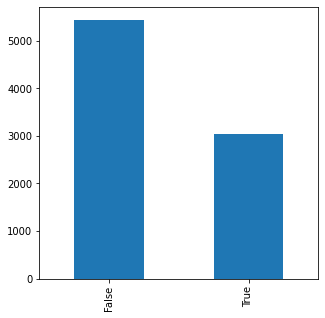

In [ ]:
# How many images are there of each breed?

raw_train_df.CryoSleep.value_counts().plot.bar(figsize=(5,5))

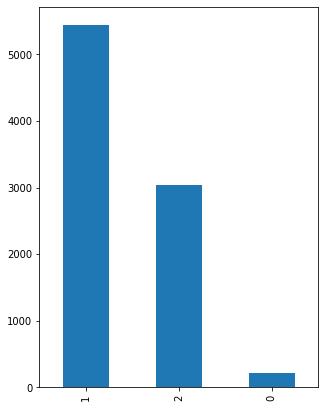

In [ ]:
# How many images are there of each breed?

df_temp.CryoSleep.value_counts().plot.bar(figsize=(5,7))

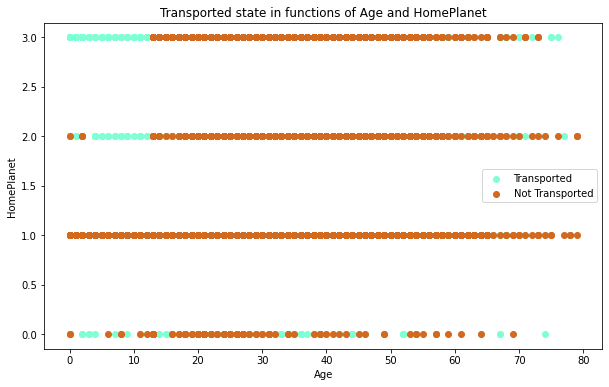

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df_temp.Age[df_temp.Transported==1],
            df_temp.HomePlanet[df_temp.Transported==1],
            c='aquamarine');

# Scatter with negative examples
plt.scatter(df_temp.Age[df_temp.Transported==0],
            df_temp.HomePlanet[df_temp.Transported==0],
            c='chocolate');

# Add some info
plt.title('Transported state in functions of Age and HomePlanet')
plt.xlabel('Age')
plt.ylabel('HomePlanet')
plt.legend(['Transported', 'Not Transported']);

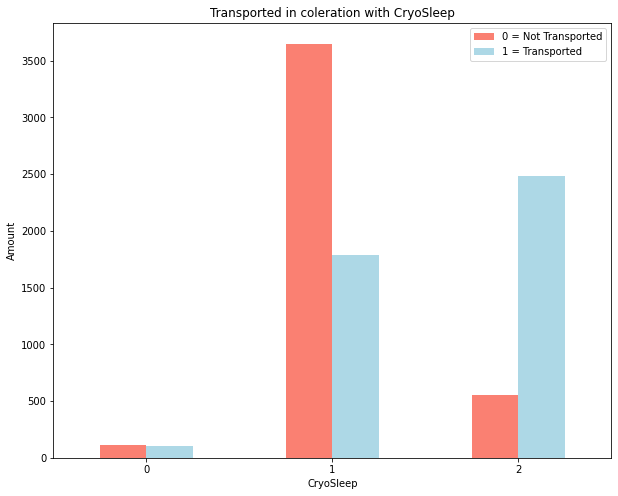

In [ ]:
# Create a plot of crosstab -> CryoSleep vs. Transported
pd.crosstab(df_temp.CryoSleep, df_temp.Transported).plot(kind='bar', 
                                    figsize = (10,8), 
                                    color=['salmon', 'lightblue'])
plt.title('Transported in coleration with CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Amount')
plt.legend(['0 = Not Transported', '1 = Transported'])
plt.xticks(rotation=0);

In [ ]:
raw_train_df.VIP.unique()

array([False, True, nan], dtype=object)

In [ ]:
df_temp.VIP.unique()

array([1, 2, 0], dtype=int8)

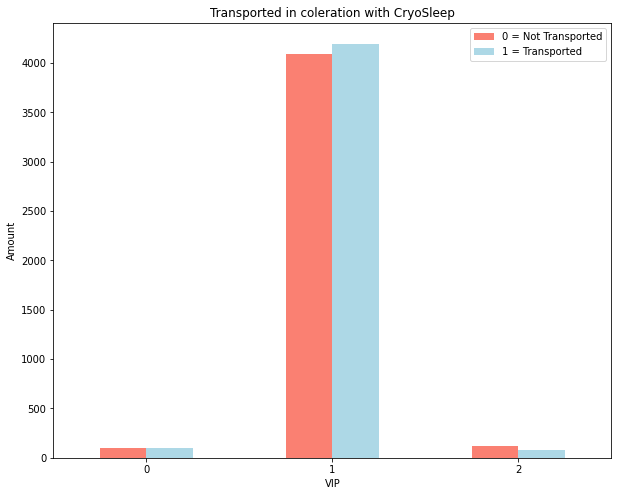

In [ ]:
# Create a plot of crosstab -> VIP vs. Transported
pd.crosstab(df_temp.VIP, df_temp.Transported).plot(kind='bar', 
                                    figsize = (10,8), 
                                    color=['salmon', 'lightblue'])
plt.title('Transported in coleration with CryoSleep')
plt.xlabel('VIP')
plt.ylabel('Amount')
plt.legend(['0 = Not Transported', '1 = Transported'])
plt.xticks(rotation=0);

In [ ]:
np.max(df_temp.Age)

79.0

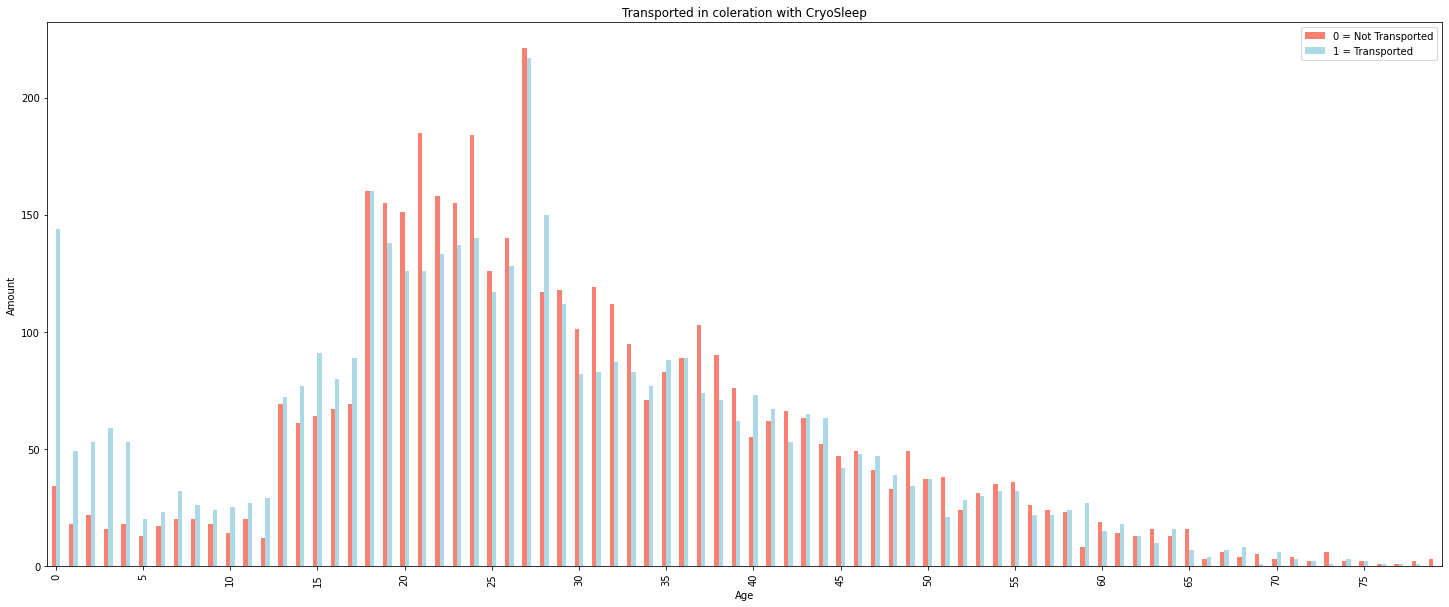

In [ ]:
# Create a plot of crosstab -> Age vs. Transported
pd.crosstab(df_temp.Age, df_temp.Transported).plot(kind='bar', 
                                    figsize = (25,10), 
                                    color=['salmon', 'lightblue'])
plt.title('Transported in coleration with CryoSleep')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend(['0 = Not Transported', '1 = Transported'])
#plt.xticks(rotation=90);
plt.xticks(np.arange(0, np.max(df_temp.Age)+1, 5),
             labels = range(0, 81, 5),
             rotation = 'vertical');

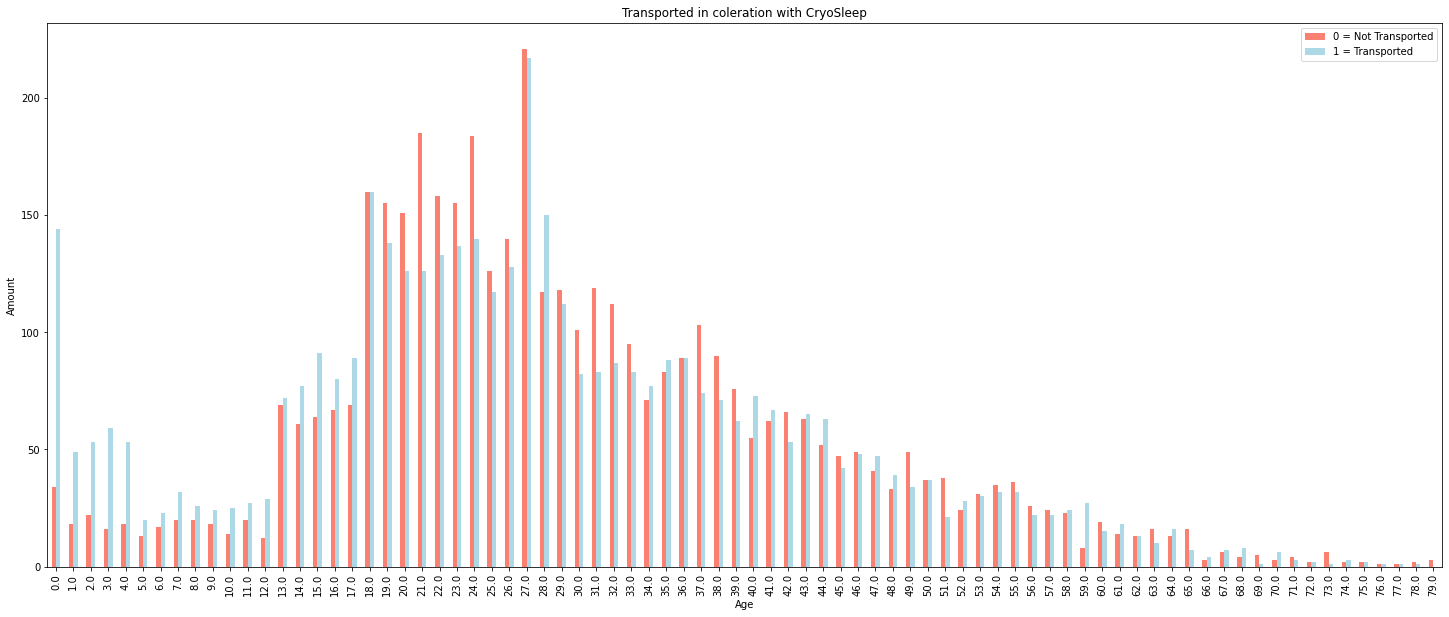

In [ ]:
# Create a plot of crosstab -> Age vs. Transported
pd.crosstab(df_temp.Age, df_temp.Transported).plot(kind='bar', 
                                    figsize = (25,10), 
                                    color=['salmon', 'lightblue'])
plt.title('Transported in coleration with CryoSleep')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend(['0 = Not Transported', '1 = Transported'])
plt.xticks(rotation=90);
# plt.xticks(np.arange(0, np.max(df_temp.Age)+1, 5),
#              labels = range(0, 81, 5),
#              rotation = 'vertical');

## Model Function

In [ ]:
def run_func_model_eval(model_type, df, test_df, scaler_fun, test_size, BATCH_SIZE, EPOCHS, LEARNING_RATE):

  X = df.drop('Transported', axis=1)
  y = df.Transported

  #split the data into train and test sets

  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)

  scaler = scaler_fun
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.fit_transform(X_val)
  X_test = scaler.transform(test_df)

  #BATCH_SIZE = 32

  ## train data
  class TrainData(Dataset):
      
      def __init__(self, X_data, y_data):
          self.X_data = X_data
          self.y_data = y_data
          
      def __getitem__(self, index):
          return self.X_data[index], self.y_data[index]
          
      def __len__ (self):
          return len(self.X_data)


  train_dataset = TrainData(torch.FloatTensor(X_train), 
                            torch.FloatTensor(y_train.to_numpy()))

  ## validation data    
  class ValData(Dataset):
      
      def __init__(self, X_data, y_data):
          self.X_data = X_data
          self.y_data = y_data
          
      def __getitem__(self, index):
          return self.X_data[index], self.y_data[index]
          
      def __len__ (self):
          return len(self.X_data)
      

  test_dataset = ValData(torch.FloatTensor(X_val),
                          torch.FloatTensor(y_val.to_numpy()))

  ## train data
  class TestData(Dataset):
      
      def __init__(self, X_data):
          self.X_data = X_data
                  
      def __getitem__(self, index):
          return self.X_data[index]
          
      def __len__ (self):
          return len(self.X_data)


  main_test_dataset = TestData(torch.FloatTensor(X_test))

  train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
  val_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE)
  test_loader = DataLoader(dataset=main_test_dataset, batch_size=1)

  torch.manual_seed(42)

  # Setup model with input parameters
  model = model_type(
      input_shape=len(X_train[0]),
      hidden_units=80, # how mnay units in the hidden layer
      output_shape=1 # one for every class
  ).to(device)

  #LEARNING_RATE = 0.001

  # Setup loss function and optimizer
  loss_fn = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.Adam(params=model.parameters(),
                              lr=LEARNING_RATE)

  #EPOCHS = 100

  model.train()
  for e in range(1, EPOCHS+1):
      epoch_loss = 0
      epoch_acc = 0
      for X_batch, y_batch in train_loader:
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)
          optimizer.zero_grad()
          
          y_pred = model(X_batch)
          
          loss = loss_fn(y_pred, y_batch.unsqueeze(1))
          acc = binary_acc(y_pred, y_batch.unsqueeze(1))
          
          loss.backward()
          optimizer.step()
          
          epoch_loss += loss.item()
          epoch_acc += acc.item()
          
      if (e % 10 == 0) or e==1:
        print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')
    
  y_pred_list = []
  test_acc=0
  model.eval()
  with torch.no_grad():
      for X_batch, y_batch in val_loader:
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)
          y_test_pred = model(X_batch)
          acc = binary_acc(y_test_pred, y_batch.unsqueeze(1))
          test_acc += acc.item()

      custom_acc = test_acc/len(val_loader)   
      print(f'Custom accurance score for this case: {custom_acc:.2f}%')
  y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
  return custom_acc, model_type, df, test_df, test_size, BATCH_SIZE, EPOCHS, LEARNING_RATE

```
  scaler = StandardScaler()
  scaler = MinMaxScaler()


  Some day to try also these:

* XGBoost
* LightGBM
* Catboost
* VotingClassifier(hard)
```

## Model results

In [ ]:
st_v1_model_SS_acc_0 = run_func_model_eval(SpaceTitanicV1, 
                                      df_temp, 
                                      test_df_temp,
                                      StandardScaler(),
                                      test_size=0.15, 
                                      BATCH_SIZE=32, 
                                      EPOCHS=50, 
                                      LEARNING_RATE=0.001)

Epoch 001: | Loss: 0.51683 | Acc: 73.481
Epoch 010: | Loss: 0.38473 | Acc: 82.030
Epoch 020: | Loss: 0.33579 | Acc: 84.203
Epoch 030: | Loss: 0.30356 | Acc: 86.381
Epoch 040: | Loss: 0.27331 | Acc: 87.403
Epoch 050: | Loss: 0.25756 | Acc: 88.463
Custom accurance score for this case: 77.24%


In [ ]:
st_v1_model_SS_acc_1 = run_func_model_eval(SpaceTitanicV1, 
                                      df_temp, 
                                      test_df_temp,
                                      StandardScaler(),
                                      test_size=0.2, 
                                      BATCH_SIZE=32, 
                                      EPOCHS=50, 
                                      LEARNING_RATE=0.001)

Epoch 001: | Loss: 0.51913 | Acc: 73.578
Epoch 010: | Loss: 0.37931 | Acc: 82.615
Epoch 020: | Loss: 0.32744 | Acc: 84.849
Epoch 030: | Loss: 0.30113 | Acc: 86.229
Epoch 040: | Loss: 0.27338 | Acc: 87.794
Epoch 050: | Loss: 0.25865 | Acc: 87.917
Custom accurance score for this case: 77.96%


In [ ]:
st_v1_model_SS_acc_2 = run_func_model_eval(SpaceTitanicV1, 
                                      df_temp, 
                                      test_df_temp,
                                      StandardScaler(),
                                      test_size=0.1, 
                                      BATCH_SIZE=32, 
                                      EPOCHS=50, 
                                      LEARNING_RATE=0.001)

Epoch 001: | Loss: 0.50100 | Acc: 75.224
Epoch 010: | Loss: 0.38355 | Acc: 81.943
Epoch 020: | Loss: 0.34266 | Acc: 83.763
Epoch 030: | Loss: 0.31241 | Acc: 85.543
Epoch 040: | Loss: 0.28155 | Acc: 87.033
Epoch 050: | Loss: 0.26295 | Acc: 87.878
Custom accurance score for this case: 76.50%


In [ ]:
st_v2_model_SS_acc_2 = run_func_model_eval(SpaceTitanicV2, 
                                      df_temp, 
                                      test_df_temp,
                                      StandardScaler(),
                                      test_size=0.1, 
                                      BATCH_SIZE=32, 
                                      EPOCHS=50, 
                                      LEARNING_RATE=0.001)

Epoch 001: | Loss: 0.49594 | Acc: 74.796
Epoch 010: | Loss: 0.39070 | Acc: 82.082
Epoch 020: | Loss: 0.35777 | Acc: 83.535
Epoch 030: | Loss: 0.33575 | Acc: 84.384
Epoch 040: | Loss: 0.31228 | Acc: 85.980
Epoch 050: | Loss: 0.29017 | Acc: 86.751
Custom accurance score for this case: 77.29%


In [ ]:
st_v3_model_SS_acc_2 = run_func_model_eval(SpaceTitanicV3, 
                                      df_temp, 
                                      test_df_temp,
                                      StandardScaler(),
                                      test_size=0.1, 
                                      BATCH_SIZE=32, 
                                      EPOCHS=50, 
                                      LEARNING_RATE=0.001)

Epoch 001: | Loss: 0.51028 | Acc: 74.580
Epoch 010: | Loss: 0.39085 | Acc: 81.363
Epoch 020: | Loss: 0.34859 | Acc: 83.522
Epoch 030: | Loss: 0.32286 | Acc: 84.943
Epoch 040: | Loss: 0.29571 | Acc: 86.433
Epoch 050: | Loss: 0.27727 | Acc: 86.878
Custom accurance score for this case: 75.39%


In [ ]:
st_v1_model_SS_acc_2 = run_func_model_eval(SpaceTitanicV1, 
                                      df_temp, 
                                      test_df_temp,
                                      StandardScaler(),
                                      test_size=0.1, 
                                      BATCH_SIZE=64, 
                                      EPOCHS=50, 
                                      LEARNING_RATE=0.001)

Epoch 001: | Loss: 0.50512 | Acc: 75.000
Epoch 010: | Loss: 0.37035 | Acc: 82.984
Epoch 020: | Loss: 0.31777 | Acc: 85.407
Epoch 030: | Loss: 0.27512 | Acc: 87.626
Epoch 040: | Loss: 0.24213 | Acc: 88.894
Epoch 050: | Loss: 0.22450 | Acc: 90.033
Custom accurance score for this case: 77.50%


In [ ]:
st_v1_model_SS_acc_2 = run_func_model_eval(SpaceTitanicV1, 
                                      df_temp, 
                                      test_df_temp,
                                      StandardScaler(),
                                      test_size=0.1, 
                                      BATCH_SIZE=32, 
                                      EPOCHS=50, 
                                      LEARNING_RATE=0.01)

Epoch 001: | Loss: 0.48741 | Acc: 76.118
Epoch 010: | Loss: 0.40574 | Acc: 80.527
Epoch 020: | Loss: 0.37815 | Acc: 82.069
Epoch 030: | Loss: 0.35447 | Acc: 83.167
Epoch 040: | Loss: 0.33025 | Acc: 84.094
Epoch 050: | Loss: 0.30248 | Acc: 85.571
Custom accurance score for this case: 76.14%


In [ ]:
st_v4_model_SS_acc_2 = run_func_model_eval(SpaceTitanicV4, 
                                      df_temp, 
                                      test_df_temp,
                                      StandardScaler(),
                                      test_size=0.1, 
                                      BATCH_SIZE=32, 
                                      EPOCHS=50, 
                                      LEARNING_RATE=0.001)

Epoch 001: | Loss: 0.52237 | Acc: 72.914
Epoch 010: | Loss: 0.40748 | Acc: 80.943
Epoch 020: | Loss: 0.38368 | Acc: 81.714
Epoch 030: | Loss: 0.36323 | Acc: 82.780
Epoch 040: | Loss: 0.35594 | Acc: 83.294
Epoch 050: | Loss: 0.33863 | Acc: 84.510
Custom accurance score for this case: 76.25%


In [ ]:
st_v1_model_SS_acc_2 = run_func_model_eval(SpaceTitanicV1, 
                                      df_temp,
                                      test_df_temp,
                                      MinMaxScaler(),
                                      test_size=0.2, 
                                      BATCH_SIZE=32, 
                                      EPOCHS=50, 
                                      LEARNING_RATE=0.001)

Epoch 001: | Loss: 0.54911 | Acc: 72.326
Epoch 010: | Loss: 0.41132 | Acc: 80.642
Epoch 020: | Loss: 0.37812 | Acc: 82.032
Epoch 030: | Loss: 0.36016 | Acc: 83.280
Epoch 040: | Loss: 0.34156 | Acc: 84.110
Epoch 050: | Loss: 0.32941 | Acc: 85.023
Custom accurance score for this case: 78.51%


In [ ]:
st_v1_model_MMS_acc_2 = run_func_model_eval(SpaceTitanicV1, 
                                      df_temp, 
                                      test_df_temp,
                                      MinMaxScaler(),
                                      test_size=0.1, 
                                      BATCH_SIZE=64, 
                                      EPOCHS=50, 
                                      LEARNING_RATE=0.001)

Epoch 001: | Loss: 0.54652 | Acc: 72.268
Epoch 010: | Loss: 0.39539 | Acc: 81.358
Epoch 020: | Loss: 0.35700 | Acc: 83.211
Epoch 030: | Loss: 0.32186 | Acc: 84.894
Epoch 040: | Loss: 0.30899 | Acc: 85.610
Epoch 050: | Loss: 0.28299 | Acc: 87.439
Custom accurance score for this case: 77.93%


In [ ]:
st_v5_model_MMS_acc_2 = run_func_model_eval(SpaceTitanicV1, 
                                      df_temp, 
                                      test_df_temp,
                                      MinMaxScaler(),
                                      test_size=0.1, 
                                      BATCH_SIZE=64, 
                                      EPOCHS=50, 
                                      LEARNING_RATE=0.01)

Epoch 001: | Loss: 0.52042 | Acc: 74.024
Epoch 010: | Loss: 0.42065 | Acc: 79.992
Epoch 020: | Loss: 0.40034 | Acc: 80.902
Epoch 030: | Loss: 0.37453 | Acc: 82.008
Epoch 040: | Loss: 0.36308 | Acc: 82.455
Epoch 050: | Loss: 0.36233 | Acc: 82.220
Custom accurance score for this case: 78.64%
